# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
train_data=pd.read_csv("Training Dataset.csv")
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# show first five row of the Data

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dimensions of Dataset

In [4]:
train_data.shape

(614, 13)

# Information of the dataset

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Statistical Summary

In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Missing values

In [7]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Duplicate Entries

In [9]:
train_data.duplicated().sum()

0

# unwanted columns

In [10]:
train_data.drop(['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: >

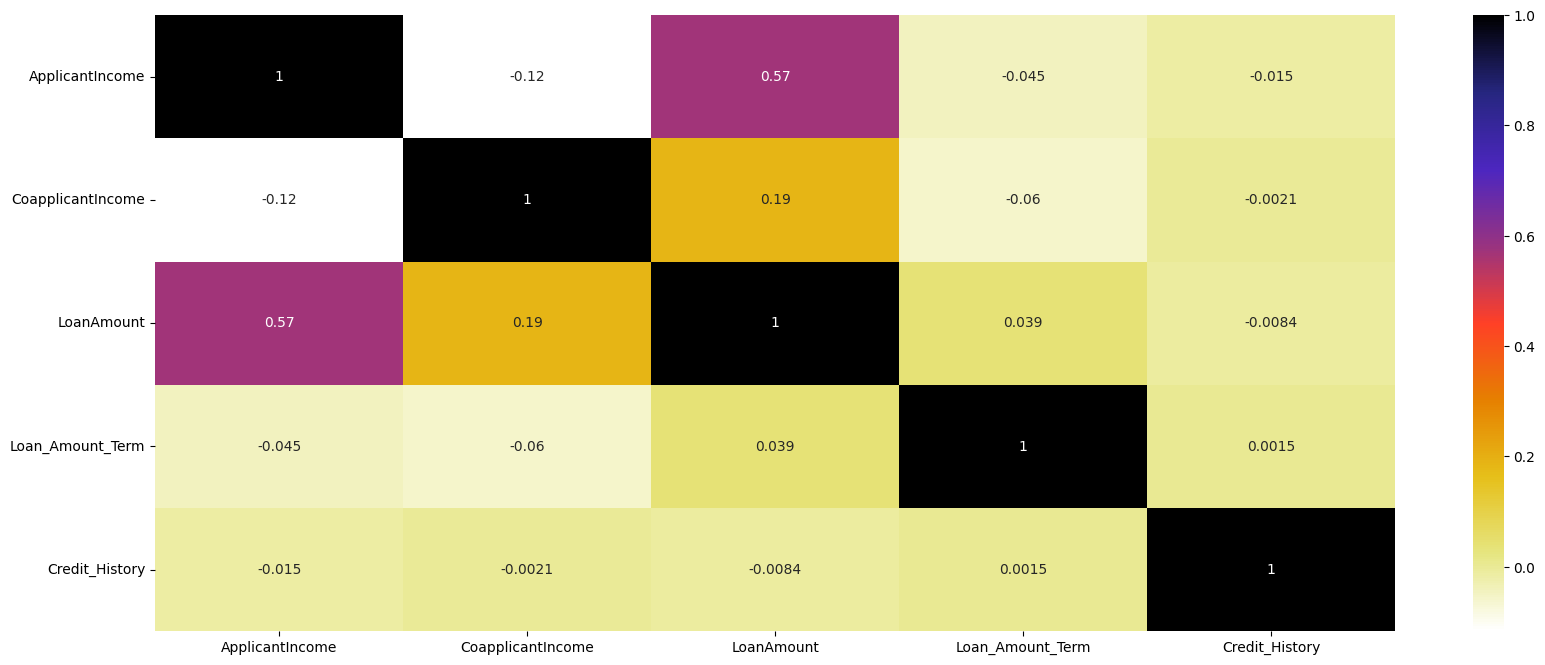

In [11]:
corr = train_data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot= True, cmap="CMRmap_r")

In [12]:
# Importing Datatset
train_data = pd.read_csv("Training Dataset.csv")
test_data = pd.read_csv("Test Dataset.csv")

# Showing Dataset
print(train_data.head)
print(test_data.head)

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [13]:
from sklearn.preprocessing import LabelEncoder

# Selected Features
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
encoded_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']

# Extracting and Preprocessing Features
data_cols = features + encoded_features
train_data = train_data[data_cols + ['Loan_Status']].dropna()
test_data = test_data[data_cols].dropna()

# Encoding categorical features
le = LabelEncoder()
for column in encoded_features:
    train_data[column] = le.fit_transform(train_data[column].astype(str))
    test_data[column] = le.fit_transform(test_data[column].astype(str))

# Features and Labels
X = train_data.drop('Loan_Status', axis=1)
Y = le.fit_transform(train_data['Loan_Status'])

# Showing Processed Data
print(X)
print(Y, len(Y))
print(test_data)


     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Gender  Married  Education  Self_Employed  Property_Area  \
1               1.0       1        1      

In [14]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Showing splitted data
print(f"Train size : {len(X_train)}")
print(f"Test size : {len(X_test)}")

Train size : 384
Test size : 96


In [15]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Showing data
print(X_train)
print(X_test)

[[-0.50779422 -0.57650121 -0.40514285 ... -0.40451992 -1.33942868
   2.19884468]
 [-0.67905965 -0.57650121 -1.21782921 ... -0.40451992 -1.33942868
  -0.75001338]
 [-0.132539   -0.57650121 -0.13829061 ... -0.40451992  1.25825119
   0.23293931]
 ...
 [ 0.94234865 -0.57650121  1.18384093 ... -0.40451992  1.25825119
  -0.75001338]
 [-0.64991825  0.79559394 -0.32023532 ... -0.40451992  1.25825119
  -0.75001338]
 [-0.71656129 -0.57650121 -1.04801415 ... -0.40451992  1.25825119
  -0.75001338]]
[[-0.07975007 -0.57650121 -0.16254991 ... -0.40451992 -1.33942868
  -0.75001338]
 [ 0.64782944 -0.57650121  1.55985999 ... -0.40451992  1.25825119
  -0.75001338]
 [-0.14830402 -0.57650121 -0.89032874 ... -0.40451992 -0.04058875
  -0.75001338]
 ...
 [ 0.4130262  -0.57650121  0.34689527 ...  2.47206616 -0.04058875
  -0.75001338]
 [ 0.18610548 -0.57650121  0.71078469 ...  2.47206616 -0.04058875
   1.21589199]
 [ 0.24582146 -0.10660561 -0.46579109 ...  2.47206616 -1.33942868
   1.21589199]]


In [16]:
# Model creation
model = LogisticRegression()

# Training Model
model.fit(X_train, Y_train)

LogisticRegression()

In [17]:
# Making Predictions
y_pred = model.predict(X_test)

# Performance Metrics
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 0.7604166666666666
Confusion Matrix:
 [[12 23]
 [ 0 61]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.34      0.51        35
           1       0.73      1.00      0.84        61

    accuracy                           0.76        96
   macro avg       0.86      0.67      0.68        96
weighted avg       0.83      0.76      0.72        96

